In [ ]:
import numpy as np
import sklearn.cluster as cl
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp


In [ ]:
# prompt: import california housing dataset from sklearn.datasets

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [ ]:
np.random.seed(42)
plt.style.use('ggplot')

In [ ]:
# Split data into features and target
X, y = housing.data, housing.target

In [ ]:
#y=y.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(16512, 8)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_test.shape

(4128,)

In [ ]:
class RBF:
    def __init__ (self, name:str):
        self.name = name

    def fit_centers (self, X:np.ndarray):
        self.KMN = cl.KMeans(n_clusters=self.nH, random_state=42)
        self.KMN.fit(X)
        self.C = self.KMN.cluster_centers_

    def fit (self, X:np.ndarray, Y:np.ndarray, nH:int, nEpoch:int=100, lr:float=1e-2):
        self.nX = X.shape[1]
        # For regression, output dimension is 1
        self.nY = 1
        self.nH = nH
        self.nEpoch = nEpoch
        self.lr = lr
        self.fit_centers(X)
        # Ensure Y is a 2D array with shape (N, 1)
        if Y.ndim == 1:
            Y = Y.reshape(-1, 1)
        self.fit_wb(X, Y)

    def fit_wb (self, X:np.ndarray, Y:np.ndarray):
        D = self.get_distances(X)
        O1 = self.bf(D)
        # Initialize weights and biases for regression (nY=1)
        self.W = np.random.uniform(-1, +1, (self.nH, self.nY))
        self.B = np.random.uniform(-1, +1, (self.nY,))
        self.history = {'loss':[]}
        O2 = self.model(O1)
        E = round(met.mean_squared_error(Y, O2), 4)
        self.history['loss'].append(E)
        print(f'Epoch: {0} -- Loss: {E}')
        for I in range(self.nEpoch):
            for x, y in zip(O1, Y):
                # Forward pass
                o = self.model(x)
                # Compute error
                e = y - o  # Shape: (1,)
                # For linear activation, derivative d = 1
                d = 1
                # Update weights and biases
                self.W += self.lr * np.outer(x, e * d)  # Shape: (nH, 1)
                self.B += self.lr * (e * d)  # Shape: (1,)
            # Compute loss after epoch
            O2 = self.model(O1)
            E = round(met.mean_squared_error(Y, O2), 4)
            self.history['loss'].append(E)
            print(f'Epoch: {I+1} -- Loss: {E}')

    def get_distances (self, X:np.ndarray):
        N = X.shape[0]
        D = np.zeros((N, self.nH))
        for i in range(N):
            for j in range(self.nH):
                D[i, j] = np.linalg.norm(X[i] - self.C[j], ord=2)
        return D

    def bf (self, D:np.ndarray, a:float=10):
        return np.exp(-a*np.power(D, 2))

    def model (self, X:np.ndarray):
        Z = np.dot(X, self.W) + self.B  # Shape: (nY,)
        # For regression, use linear activation
        O = Z
        return O

    def predict (self, X:np.ndarray):
        D = self.get_distances(X)
        O1 = self.bf(D)
        O2 = self.model(O1)
        return O2.flatten()  # Return as 1D array for regression

In [ ]:
Model = RBF('My First RBF')

Model.fit(X_train, y_train.reshape(-1,1), 20, nEpoch=1000, lr=1e-3)

Epoch: 0 -- Loss: 8.2079
Epoch: 1 -- Loss: 1.3421
Epoch: 2 -- Loss: 1.3418
Epoch: 3 -- Loss: 1.3416
Epoch: 4 -- Loss: 1.3413
Epoch: 5 -- Loss: 1.341
Epoch: 6 -- Loss: 1.3407
Epoch: 7 -- Loss: 1.3405
Epoch: 8 -- Loss: 1.3402
Epoch: 9 -- Loss: 1.34
Epoch: 10 -- Loss: 1.3398
Epoch: 11 -- Loss: 1.3396
Epoch: 12 -- Loss: 1.3393
Epoch: 13 -- Loss: 1.3391
Epoch: 14 -- Loss: 1.3389
Epoch: 15 -- Loss: 1.3387
Epoch: 16 -- Loss: 1.3385
Epoch: 17 -- Loss: 1.3383
Epoch: 18 -- Loss: 1.3382
Epoch: 19 -- Loss: 1.338
Epoch: 20 -- Loss: 1.3378
Epoch: 21 -- Loss: 1.3377
Epoch: 22 -- Loss: 1.3375
Epoch: 23 -- Loss: 1.3373
Epoch: 24 -- Loss: 1.3372
Epoch: 25 -- Loss: 1.337
Epoch: 26 -- Loss: 1.3369
Epoch: 27 -- Loss: 1.3367
Epoch: 28 -- Loss: 1.3366
Epoch: 29 -- Loss: 1.3364
Epoch: 30 -- Loss: 1.3363
Epoch: 31 -- Loss: 1.3362
Epoch: 32 -- Loss: 1.3361
Epoch: 33 -- Loss: 1.3359
Epoch: 34 -- Loss: 1.3358
Epoch: 35 -- Loss: 1.3357
Epoch: 36 -- Loss: 1.3356
Epoch: 37 -- Loss: 1.3354
Epoch: 38 -- Loss: 1.3353
E

Test MSE: 1.2937310348277127


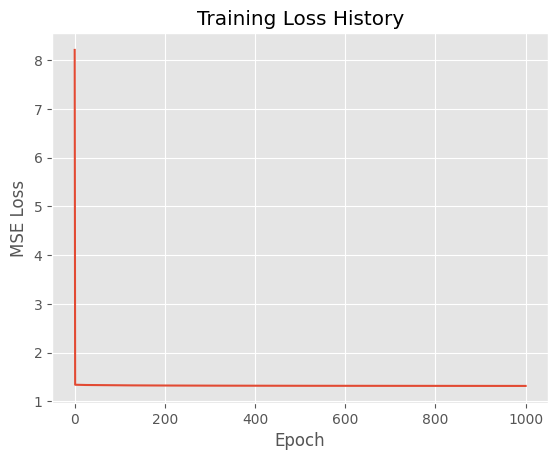

In [ ]:
y_pred = Model.predict(X_test)

    # Evaluate performance
mse = met.mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

# Optional: Plot loss history
plt.plot(Model.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss History')
plt.show()

In [ ]:
!git clone https://github.com/PetraVidnerova/rbf_keras

fatal: destination path 'rbf_keras' already exists and is not an empty directory.


In [ ]:
!pip install tensorflow==2.10.0 # Install TensorFlow 2.10.0
!pip install keras==2.10.0 # Install Keras 2.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 39.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

In [ ]:
from sklearn.model_selection import KFold
import keras
from keras import layers
import tensorflow
from rbf_keras import kmeans_initializer
from keras.optimizers import RMSprop
from rbf_keras import rbflayer

In [ ]:
kfold=KFold(n_splits=2)
histories=[]

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

rbfLayer=rbflayer.RBFLayer(40,initializer=kmeans_initializer.InitCentersKMeans(X_train), betas=1.0, input_shape=([X_train.shape[1]]))

model=keras.models.Sequential()
model.add(rbfLayer)
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=RMSprop())

history=model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.1)
histories.append(history)



Epoch 1/100
186/186 [==============================] - 1s 3ms/step - loss: 5.1325 - val_loss: 4.9361
Epoch 2/100
186/186 [==============================] - 0s 2ms/step - loss: 4.4498 - val_loss: 4.2645
Epoch 3/100
186/186 [==============================] - 0s 2ms/step - loss: 3.8351 - val_loss: 3.6603
Epoch 4/100
186/186 [==============================] - 0s 2ms/step - loss: 3.2884 - val_loss: 3.1252
Epoch 5/100
186/186 [==============================] - 0s 2ms/step - loss: 2.8118 - val_loss: 2.6602
Epoch 6/100
186/186 [==============================] - 0s 2ms/step - loss: 2.4027 - val_loss: 2.2615
Epoch 7/100
186/186 [==============================] - 0s 2ms/step - loss: 2.0641 - val_loss: 1.9330
Epoch 8/100
186/186 [==============================] - 0s 2ms/step - loss: 1.7939 - val_loss: 1.6726
Epoch 9/100
186/186 [==============================] - 0s 2ms/step - loss: 1.5872 - val_loss: 1.4797
Epoch 10/100
186/186 [==============================] - 0s 2ms/step - loss: 1.4511 - val_lo

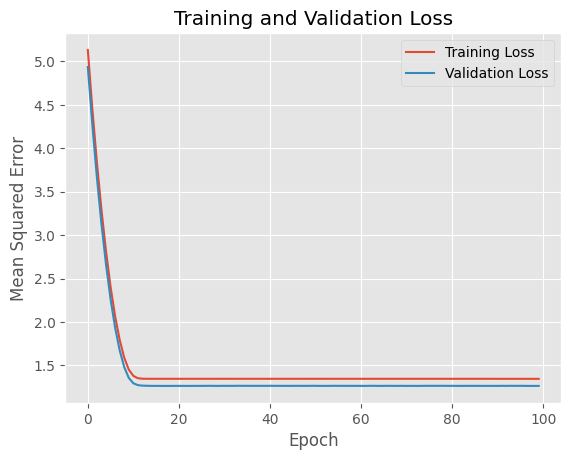

In [ ]:
import pandas as pd


plot = pd.DataFrame(history.history).plot(title="Training and Validation Loss")  # Access history directly and set title
plot.set_xlabel("Epoch")  # Set x-axis label
plot.set_ylabel("Mean Squared Error")  # Set y-axis label
plot.legend(['Training Loss', 'Validation Loss'])  # Add legend


In [ ]:
y_pred_keras = model.predict(X_test)
mse_keras = met.mean_squared_error(y_test, y_pred_keras)
print(f"Test MSE (Keras RBF): {mse_keras}")

323/323 [==============================] - 1s 1ms/step
Test MSE (Keras RBF): 1.3258191481253594


In [ ]:
from keras import layers
from keras.models import Sequential

# Assuming X_train and y_train are defined from the previous code

model2 = Sequential()
model2.add(layers.Dense(20, activation='tanh', input_shape=(X_train.shape[1],)))  # Hidden layer with 20 neurons and ReLU activation
model2.add(layers.Dense(1, activation='linear'))  # Output layer with linear activation

# Compile the model
model2.compile(optimizer='adam', loss='mse') # Example optimizer and loss function, adjust as needed

# Train the model
history2= model2.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.1) # Adjust epochs and batch_size as needed

# Evaluate the model
loss = model2.evaluate(X_test, y_test)
print(f"Model2 Test Loss: {loss}")

# Make predictions
y_pred_model2 = model2.predict(X_test)
mse_MLP = met.mean_squared_error(y_test, y_pred_model2)
print(f"Test MSE (Keras RBF): {mse_MLP}")

Epoch 1/100
186/186 [==============================] - 1s 2ms/step - loss: 1.3601 - val_loss: 1.3027
Epoch 2/100
186/186 [==============================] - 0s 2ms/step - loss: 1.3316 - val_loss: 1.2416
Epoch 3/100
186/186 [==============================] - 0s 2ms/step - loss: 1.3164 - val_loss: 1.2696
Epoch 4/100
186/186 [==============================] - 0s 2ms/step - loss: 1.3015 - val_loss: 1.2335
Epoch 5/100
186/186 [==============================] - 0s 2ms/step - loss: 1.2937 - val_loss: 1.2346
Epoch 6/100
186/186 [==============================] - 0s 2ms/step - loss: 1.2624 - val_loss: 1.1382
Epoch 7/100
186/186 [==============================] - 0s 2ms/step - loss: 1.2253 - val_loss: 1.2294
Epoch 8/100
186/186 [==============================] - 0s 2ms/step - loss: 1.1026 - val_loss: 0.9807
Epoch 9/100
186/186 [==============================] - 0s 2ms/step - loss: 0.9445 - val_loss: 0.8383
Epoch 10/100
186/186 [==============================] - 0s 2ms/step - loss: 0.8389 - val_lo

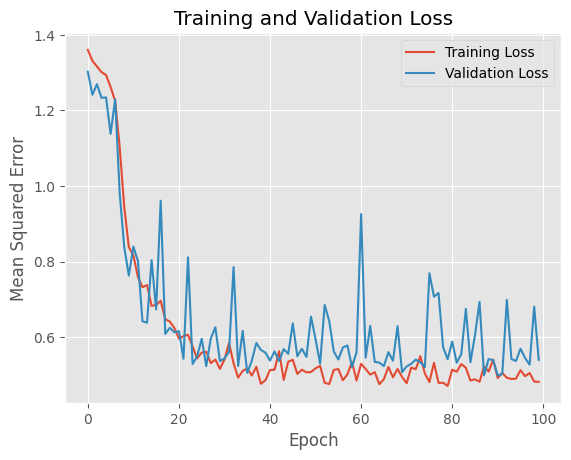

In [ ]:
plot = pd.DataFrame(history2.history).plot(title="Training and Validation Loss")  # Access history directly and set title
plot.set_xlabel("Epoch")  # Set x-axis label
plot.set_ylabel("Mean Squared Error")  # Set y-axis label
plot.legend(['Training Loss', 'Validation Loss'])  # Add legend
